In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("drug.csv")

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,55,M,LOW,HIGH,11.877,drugC
1,23,M,HIGH,NORMAL,20.172,drugY
2,17,M,LOW,NORMAL,11.584,drugX
3,53,M,HIGH,NORMAL,23.184,drugY
4,59,F,LOW,HIGH,20.142,drugC
...,...,...,...,...,...,...
495,36,F,LOW,NORMAL,28.492,drugY
496,62,M,HIGH,HIGH,27.947,drugY
497,59,M,NORMAL,NORMAL,19.250,drugY
498,64,F,NORMAL,HIGH,18.808,drugX


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
X = df.drop(columns= 'Drug')
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
features = ['Sex', 'BP', 'Cholesterol']
encoder = OrdinalEncoder()
X_train[features] = encoder.fit_transform(X_train[features])
X_test[features] = encoder.transform(X_test[features])

In [7]:
print(X_train.head())
print(X_test.head())

     Age  Sex   BP  Cholesterol  Na_to_K
227   41  1.0  1.0          1.0   24.876
372   43  1.0  0.0          0.0   22.028
259   32  0.0  2.0          0.0   16.889
328   63  1.0  2.0          0.0   27.727
363   58  0.0  1.0          1.0    7.614
     Age  Sex   BP  Cholesterol  Na_to_K
231   61  0.0  0.0          0.0    8.167
93    22  0.0  0.0          0.0   22.005
457   55  0.0  2.0          1.0   11.259
414   54  0.0  0.0          0.0   18.176
209   21  1.0  2.0          1.0   22.656


In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}) 
print(result.head())

    Actual Predicted
231  drugY     drugY
93   drugY     drugY
457  drugX     drugX
414  drugY     drugY
209  drugY     drugY


In [9]:
from sklearn.metrics import accuracy_score , classification_report
accuracy = accuracy_score(y_test, y_pred)
class_report= classification_report(y_test, y_pred)
print(f"the accuracy score is{accuracy}")
print(f"the classification report is {class_report}")

the accuracy score is1.0
the classification report is               precision    recall  f1-score   support

       drugC       1.00      1.00      1.00        18
       drugX       1.00      1.00      1.00        29
       drugY       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



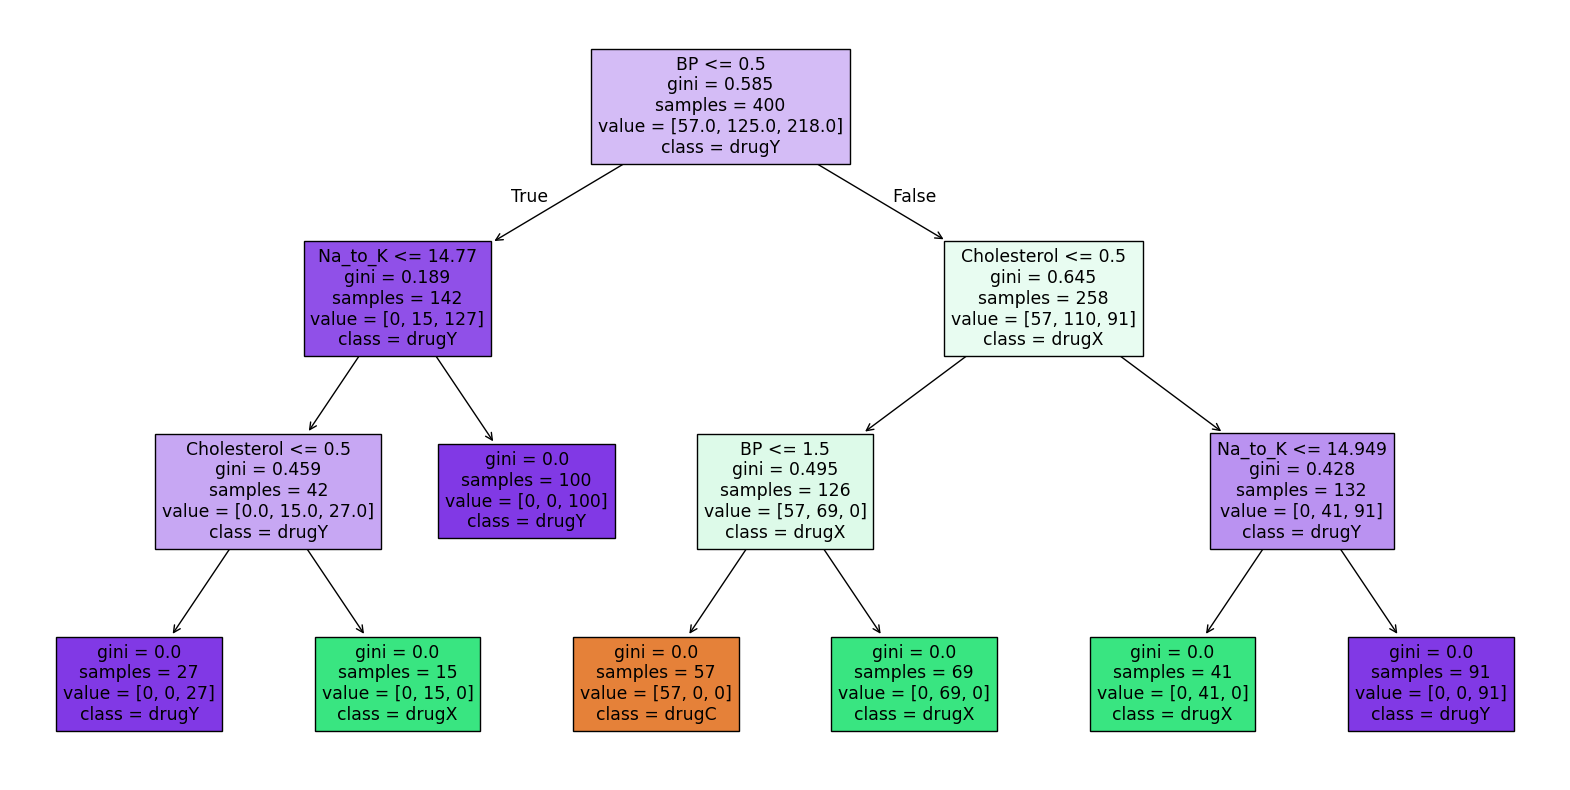

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()
